In [1]:
from typing import Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задача 1. «Однорукий бандит»
Пусть имеется игровой автомат с ручкой, с помощью которой его запускают
для игры – «однорукий бандит». Предположим, что игра ведётся по
следующей схеме:
1) В начальный момент времени у игрока есть одна монета
2) Вероятность выигрыша при запуске игры – 0.5. При выигрыше игрок
   получает 1 монету. При проигрыше, соответственно, теряет 1 монету.
3) Игра заканчивается либо если игрок обанкротится (поражение), либо
   если выиграет 10 монет (победа).
Определить вероятность выигрыша. Также оценить среднее число шагов,
требующееся для победы и для поражения.

In [2]:
def play1() -> tuple[bool, int]:
    coins: int = 1
    steps: int = 0

    while 0 < coins < 10:
        steps += 1
        op = np.random.randint(0, 2)
        if op == 0:
            coins += 1
        else:
            coins -= 1

    return coins == 10, steps


def task1() -> None:
    sample_size: int = 500_000
    win_count: int = 0

    wins = np.empty(sample_size, dtype=bool)
    steps = np.empty(sample_size, dtype=int)

    for i in range(sample_size):
        wins[i], steps[i] = play1()

    print(f'Win probability: {win_count / sample_size}')
    print(f'Average steps to win: {steps[wins].mean():.4f}')
    print(f'Average steps to lose: {steps[~wins].mean():.4f}')

In [3]:
task1()

Win probability: 0.0
Average steps to win: 32.9269
Average steps to lose: 6.3120


Вероятность победить стремится к нулю

## Задача 2. Распределение зерен по шахматной доске.
На шахматную доску случайным образом бросают 64 зерна. Определить, как
зерна по количеству распределятся в клетках – то есть, сколько в среднем
клеток будет содержать N зёрен для каждого N.

In [4]:
def throw():
    return np.random.randint(0, 8), np.random.randint(0, 8)


def play2() -> Dict[int, int]:
    field = np.zeros([8, 8], dtype=np.int64)
    for _ in range(64):
        field[throw()] += 1

    seed_counts, cell_counts = np.unique(field, return_counts=True)
    return dict(zip(seed_counts, cell_counts))


def task2():
    data = np.zeros(65)
    sample_size: int = 50_000

    for _ in range(sample_size):
        for seeds, cells in play2().items():
            data[seeds] += cells

    mean = data / sample_size

    for i in range(10):
        print(f'Mean number of cells with {i} seeds: {mean[i]}')

    plt.bar(
        np.arange(0, 65, 1, dtype=int), mean
    )
    plt.xlim(-1, 10)
    plt.xticks(range(10), range(10))
    plt.show()

Mean number of cells with 0 seeds: 23.35732
Mean number of cells with 1 seeds: 23.7187
Mean number of cells with 2 seeds: 11.88546
Mean number of cells with 3 seeds: 3.89052
Mean number of cells with 4 seeds: 0.93716
Mean number of cells with 5 seeds: 0.17942
Mean number of cells with 6 seeds: 0.0273
Mean number of cells with 7 seeds: 0.0037
Mean number of cells with 8 seeds: 0.0004
Mean number of cells with 9 seeds: 2e-05


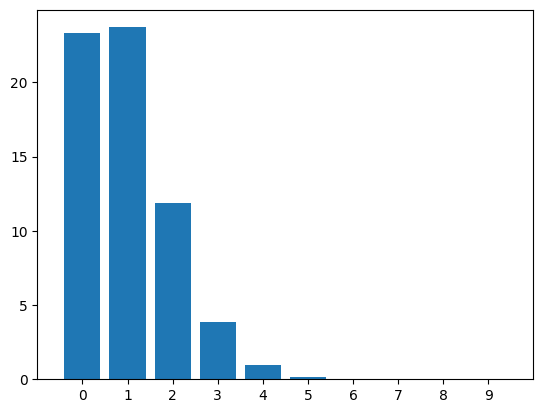

In [5]:
task2()

В среднем чаще всего на клетках лежит 0 или 1 зерно

## Задача 3. Порядок на экзамене
Экзамен проходит по следующей схеме: если некоторый билет уже был
вытянут, то после ответа экзаменатор откладывает его в сторону. Студент
выучил 20 билетов из 30. Когда ему выгоднее идти - первым или вторым,
чтобы вероятность вынуть выученный билет была больше

In [6]:
def studied(num: int):
    return 0 <= num < 20


def play3(second: bool = False) -> bool:
    tickets = list(range(30))

    if second:
        ch = np.random.choice(tickets)
        tickets.remove(ch)

    ch = np.random.choice(tickets)
    return ch < 20


def task3():
    sample_size: int = 1_000_000

    success_first: int = 0
    success_second: int = 0

    for _ in range(sample_size):
        if play3():
            success_first += 1
        if play3(second=True):
            success_second += 1

    print(f'Goes second, success chance: {success_first / sample_size}')
    print(f'Goes second, success chance: {success_second / sample_size}')

In [7]:
task3()

Goes second, success chance: 0.666835
Goes second, success chance: 0.666569


Шансы практически равны